In [1]:
from new_mapevb import *
def fit_EVB_parameters(
    A_xvgs,
    B_xvgs,
    barrier,
    free_energy,
    alpha_guess=0,
    H12_guess=20,
    tol=0.0001,
    max_iter=50,
    fitting_slowness=1,
    verbose=True,
):

    fitting = True
    alpha = alpha_guess
    H12 = H12_guess
    i = 0
    
    while fitting and i < max_iter:
        ts_energy_measured, dg_energy_measured= evbmap_nooutput(A_xvgs,B_xvgs,alpha,H12,dl,kb,temp,bins,minpts)
        # if within tollerance, set fitting to False, otherwise adjust parameters
        barrier_dif = barrier - ts_energy_measured
        free_energy_dif = free_energy - dg_energy_measured
        if abs(barrier_dif) < tol and abs(free_energy_dif) < tol:
            fitting = False
        else:
            if abs(barrier_dif) > tol:
                # increase H12 if barrier is too high, otherwise reduce H12
                H12 += barrier_dif * fitting_slowness
            if abs(free_energy_dif) > tol:
                # increase alpha if free energy is too low, otherwise reduce alpha
                alpha += free_energy_dif * fitting_slowness
        i += 1
        if verbose:
            print(
                f"iteration {i} \t alpha: {alpha:<.5f} \t H12: {H12:<.5f} \t \t barrier: {ts_energy_measured:<.5f} \t free energy: {dg_energy_measured:<.5f}"
            )
    if i == max_iter:
        print(
            "Max iterations reached, fitting did not converge. Maybe try with more itterations, a higher tolerance or a lower fitting slowness."
        )
    print('alpha= ',alpha, 'H12= ',H12)
    return alpha, H12

In [2]:
dl=1/20
kb: float = 1.987204259e-3  # kcal/molK
temp=298.15
bins=80
joule_to_cal: float = 0.239001

#A_xvgs,B_xvgs =fetchA_B_xvgs('potentialA','potentialB')
#evbmap_nooutput(A_xvgs,B_xvgs,alpha,hij,dl,kb,temp,bins,minpts)


In [10]:
#A_xvgs,B_xvgs =fetchA_B_xvgs('vacuumpotentialA','vacuumpotentialB')
#alpha, H12=fit_EVB_parameters(A_xvgs,B_xvgs,6.2,-6.9, alpha_guess=0, H12_guess=20, tol=0.1, max_iter=50, fitting_slowness=1, verbose=True)

iteration 1 	 alpha: 3.13134 	 H12: 13.62098 	 	 barrier: 12.57902 	 free energy: -10.03134
iteration 2 	 alpha: 3.78464 	 H12: 1.46462 	 	 barrier: 18.35636 	 free energy: -7.55330
iteration 3 	 alpha: 4.24799 	 H12: -20.34555 	 	 barrier: 28.01017 	 free energy: -7.36336
iteration 4 	 alpha: 3.23650 	 H12: -28.03160 	 	 barrier: 13.88605 	 free energy: -5.88851
iteration 5 	 alpha: 2.31312 	 H12: -30.59612 	 	 barrier: 8.76452 	 free energy: -5.97662
iteration 6 	 alpha: 1.89359 	 H12: -31.43410 	 	 barrier: 7.03798 	 free energy: -6.48047
iteration 7 	 alpha: 1.71527 	 H12: -31.70273 	 	 barrier: 6.46863 	 free energy: -6.72168
iteration 8 	 alpha: 1.71527 	 H12: -31.70273 	 	 barrier: 6.27237 	 free energy: -6.83797
alpha=  1.7152654208387155 H12=  -31.70273257665458


In [3]:
minpts=20 #minimum of bin count
out='waterfep'
A_xvgs,B_xvgs =fetchA_B_xvgs('waterpotentialA','waterpotentialB')
alpha, H12=fit_EVB_parameters(A_xvgs,B_xvgs,6.2,-6.9, alpha_guess=0, H12_guess=20, tol=0.1, max_iter=50, fitting_slowness=1, verbose=True)


iteration 1 	 alpha: -2.75711 	 H12: 5.85299 	 	 barrier: 20.34701 	 free energy: -4.14289
iteration 2 	 alpha: -1.86633 	 H12: -18.40522 	 	 barrier: 30.45821 	 free energy: -7.79078
iteration 3 	 alpha: -2.69013 	 H12: -32.87680 	 	 barrier: 20.67158 	 free energy: -6.07620
iteration 4 	 alpha: -4.18440 	 H12: -37.36303 	 	 barrier: 10.68623 	 free energy: -5.40573
iteration 5 	 alpha: -4.92045 	 H12: -38.85812 	 	 barrier: 7.69509 	 free energy: -6.16395
iteration 6 	 alpha: -5.23710 	 H12: -39.37172 	 	 barrier: 6.71360 	 free energy: -6.58336
iteration 7 	 alpha: -5.35746 	 H12: -39.55016 	 	 barrier: 6.37844 	 free energy: -6.77964
iteration 8 	 alpha: -5.35746 	 H12: -39.55016 	 	 barrier: 6.25913 	 free energy: -6.85664
alpha=  -5.35745733323663 H12=  -39.550161609488015


TS:    0.71,   dG0:  -10.09
0.7050596560353615 -10.091864871735524


(0.7050596560353615, -10.091864871735524)

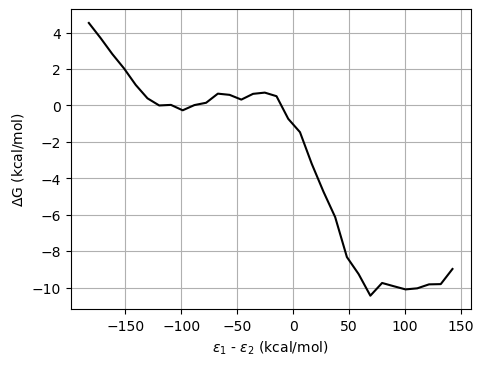

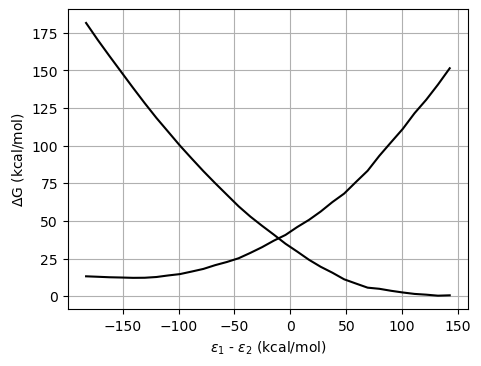

In [9]:
minpts=20 #minimum of bin count
out='vacuumfep'
bins =50
A0_xvgs,B0_xvgs =fetchA_B_xvgs('vacuumpotentialA','vacuumpotentialB')
evbmap(A0_xvgs,B0_xvgs,alpha, H12 ,dl,kb,temp,bins,minpts,out)

TS:    0.71,   dG0:  -10.09
0.7050596560353615 -10.091864871735524


(0.7050596560353615, -10.091864871735524)

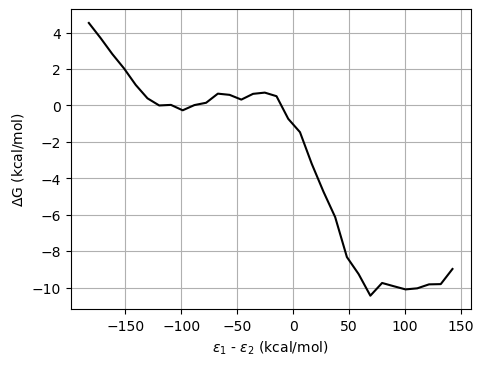

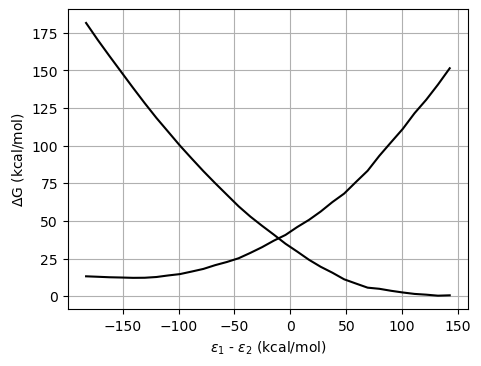

In [11]:
minpts=20 #minimum of bin count
out='vacuumfep'
bins =50
A0_xvgs,B0_xvgs =fetchA_B_xvgs('vacuumpotentialA','vacuumpotentialB')
evbmap(A0_xvgs,B0_xvgs,alpha, H12 ,dl,kb,temp,bins,minpts,out)

TS:    5.57,   dG0:   -8.55


(5.571578247112853, -8.552442629534344)

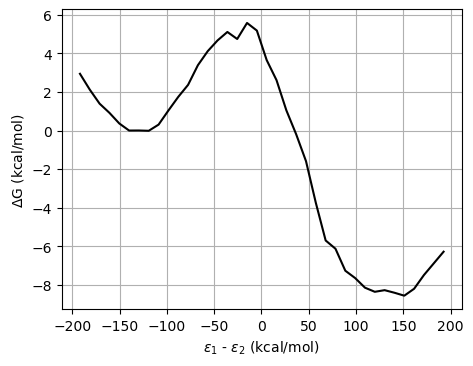

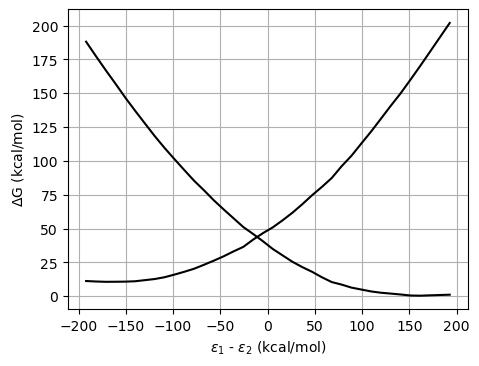

In [52]:
minpts=20 #minimum of bin count
out='mofcornerfep'
A2_xvgs,B2_xvgs =fetchA_B_xvgs('potentialA2','potentialB2')
evbmap(A2_xvgs,B2_xvgs,alpha, H12 ,dl,kb,temp,bins,minpts,out)

TS:    3.02,   dG0:  -16.07


(3.0218945002987336, -16.066546101146482)

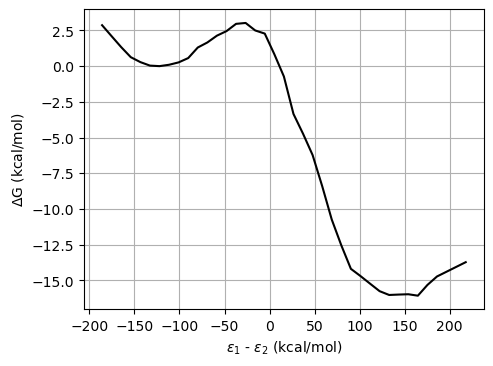

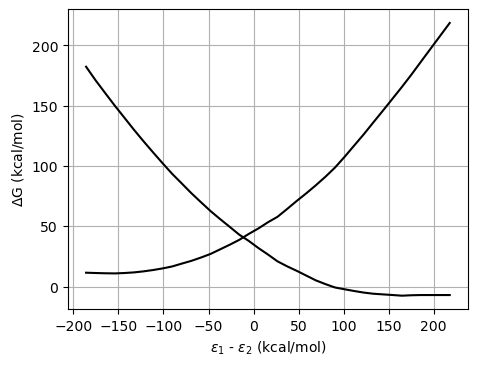

In [53]:
minpts=20 #minimum of bin count
out='mofcenterfep'
A3_xvgs,B3_xvgs =fetchA_B_xvgs('potentialAcenter','potentialBcenter')
evbmap(A3_xvgs,B3_xvgs,alpha, H12 ,dl,kb,temp,bins,minpts,out)